##  Load and explore the dataset

In [1]:
# Load the pandas and numpy packages
import pandas as pd
import numpy as np

In [2]:
# Import csv file and save into data
df = pd.read_csv('../data/raw/beer_reviews.csv')

In [3]:
# Display the first 5 rows of data and all the columns
pd.options.display.max_rows
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


An initial review of the above data suggests that:
1) There is a mix of numerical and categorical data.
2) brewery_id is representative of the brewery_name.
3) beer_beerid is representative of beer_name 
4) beer_beerid is a unique identifier

In [4]:
# Display the summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


The above query confirms there is a mix of categorical and numerical data. All features with data type 'object' [brewery_name, review_profilename, beer_style and beer_name] are categorical with the remaining beyond numerical. All categorical features will need to be converted to numerical. There also seem to be some missing values. Let us investigate further.

In [5]:
# Display the dimensions(shape) of data
df.shape

(1586614, 13)

There should be 13 features with 1,586,614 observations each. 

In [6]:
# Display number of missing values in each column
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

We see there are three columns with missing values: [brewery_name],[review_profilename] and [beer_abv]. The number of missing values for [brewery_name] and [review_profilename] is insignificant and therefore we will remove them. [beer_abv] has approximately 4.2% of the data missing which is too large to simply remove. We will therefore replace these values with the mean from all other observations of the same feature.

In [7]:
# Display distribution of data for [beer_abv] to determine if median or mean if a more appropriate value to replace the missing values

In [8]:
#Create a for loop that will iterate through each columns and print their list of unique values
for col in df.columns:
  print(col)
  print(df[col].unique())

brewery_id
[10325  1075   163 ... 12566  7337  6102]
brewery_name
['Vecchio Birraio' 'Caldera Brewing Company' 'Amstel Brouwerij B. V.' ...
 'Wissey Valley Brewery' 'Outback Brewery Pty Ltd'
 'Georg Meinel Bierbrauerei KG']
review_time
[1234817823 1235915097 1235916604 ... 1160702513 1160023044 1160005319]
review_overall
[1.5 3.  4.  3.5 4.5 5.  2.  2.5 1.  0. ]
review_aroma
[2.  2.5 3.  4.5 3.5 5.  4.  1.5 1. ]
review_appearance
[2.5 3.  3.5 4.  5.  4.5 2.  1.  1.5 0. ]
review_profilename
['stcules' 'johnmichaelsen' 'oline73' ... 'hogshead' 'NyackNicky'
 'joeebbs']
beer_style
['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'American Stout' 'Russian Imperial Stout'
 'American Amber / Red Ale' 'American Strong Ale' 'Märzen / Oktoberfest'
 'American Adj

We see the categorical variables [brewery_name, review_profilename, beer_style and beer_name] are all nominal (without order) and thus should be encoded to numeric with One Hot Encoding. However to avoid the creation of multiple columns for the target variable, we will label encode [beer_style] instead. 

In [9]:
#Determine if beer_beer_id is a unique identifier

n = len(pd.unique(df['beer_beerid']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 66055


We see the number of unique values for beer_beer_id does not match the number of rows in the dataset (1586614) and therefore we can rule out it being a unique identifier.


In [10]:
# Display the descriptive statistics
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


Values for all features seem valid. Review scores range between 0 and 5, there are no negative values and all minimum and maximum values align with logical expectations given the context of the data.

##### Data Preparation

In [11]:
#Create a copy of df and save it into a variable called df_cleaned

df_cleaned = df.copy()

In [12]:
#Remove missing values for 'brewery_name' and 'review_profilename' 
df_cleaned = df_cleaned.dropna(how='any',subset=['brewery_name', 'review_profilename'])

In [13]:
# Replace missing value in 'beer_abv' with its mean
beer_abv_mean = df_cleaned['beer_abv'].mean()
df_cleaned['beer_abv'] = df_cleaned['beer_abv'].fillna(beer_abv_mean)

In [14]:
df_cleaned.shape

(1586251, 13)

In [15]:
# Display number of missing values in each column
df_cleaned.isnull().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

No missing values remain. 

In [16]:
# Check the whether there are duplicate rows
sum(df_cleaned.duplicated())

0

##### Encoding Categorical Variables

In [17]:
#Check number of unique values for all categorical variables

n1 = len(pd.unique(df_cleaned['brewery_name']))
  
print("No.of.unique values 'brewery_name' :", 
      n1)

n2 = len(pd.unique(df_cleaned['review_profilename']))
  
print("No.of.unique values 'review_profilename' :", 
      n2)

n3 = len(pd.unique(df_cleaned['beer_style']))
  
print("No.of.unique values 'beer_style' :", 
      n3)

n4 = len(pd.unique(df_cleaned['beer_name']))
  
print("No.of.unique values 'beer_name' :", 
      n4)

No.of.unique values 'brewery_name' : 5742
No.of.unique values 'review_profilename' : 33387
No.of.unique values 'beer_style' : 104
No.of.unique values 'beer_name' : 56847


[brewery_name, review_profilename and beer_name] in particular have excessive unique values and thus are not suited for one hot encoding. [beer_style] is the target variable. If we perform one hot encoding it will create multiple columns for the single feature which we want to avoid in this case. Therefore we shall label encode instead as an alternative measure. 

##### Data Preparation

In [18]:
n = 40 #Top 40 classes by frequency for target variable. Change to 104 for results with all classes included. 
df_cleaned['beer_style'].value_counts()[:n].sum()/1586614

0.7680872600393038

In [19]:
n = 40  #Top 40 classes by frequency for target variable. Change to 104 for results with all classes included. 
df_cleaned['beer_style'].value_counts()[:n]

American IPA                           117566
American Double / Imperial IPA          85958
American Pale Ale (APA)                 63460
Russian Imperial Stout                  54120
American Double / Imperial Stout        50696
American Porter                         50473
American Amber / Red Ale                45740
Belgian Strong Dark Ale                 37731
Fruit / Vegetable Beer                  33859
American Strong Ale                     31938
Belgian Strong Pale Ale                 31486
Saison / Farmhouse Ale                  31475
American Adjunct Lager                  30733
Tripel                                  30319
Witbier                                 30131
Hefeweizen                              27901
American Barleywine                     26721
American Brown Ale                      25291
American Stout                          24533
American Pale Wheat Ale                 24201
Märzen / Oktoberfest                    23521
English Pale Ale                  

<AxesSubplot: >

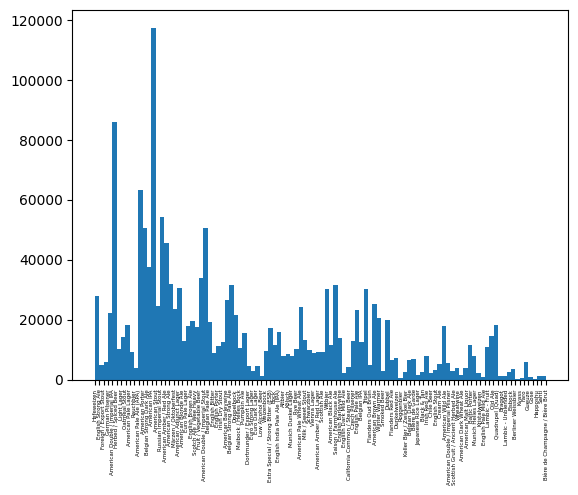

In [20]:
import matplotlib.pyplot as plt


df_cleaned['beer_style'].hist(grid=False, xlabelsize=4, xrot=90, bins=104)

The frequency of data is clearly quite skewed with some unique values in the target variable accounting for a much larger portion of the dataset. Let us limit the classes to the top 40 by frequency.

In [21]:
threshold = 13165  # Remove items less than or equal to threshold which is p-1 where p is the number of values for the 30th most frequent unique value in 'beer_style'. Change to 0 for results with all 104 classes.
for col in df.columns:
    value_counts = df_cleaned['beer_style'].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    df_cleaned['beer_style'].replace(to_remove, np.nan, inplace=True)

In [22]:
df_cleaned['beer_style'].value_counts()

American IPA                           117566
American Double / Imperial IPA          85958
American Pale Ale (APA)                 63460
Russian Imperial Stout                  54120
American Double / Imperial Stout        50696
American Porter                         50473
American Amber / Red Ale                45740
Belgian Strong Dark Ale                 37731
Fruit / Vegetable Beer                  33859
American Strong Ale                     31938
Belgian Strong Pale Ale                 31486
Saison / Farmhouse Ale                  31475
American Adjunct Lager                  30733
Tripel                                  30319
Witbier                                 30131
Hefeweizen                              27901
American Barleywine                     26721
American Brown Ale                      25291
American Stout                          24533
American Pale Wheat Ale                 24201
Märzen / Oktoberfest                    23521
English Pale Ale                  

In [23]:
#Label Encode Categorical Variables (including target variable)

# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

cat_cols = ['brewery_name', 'review_profilename', 'beer_name', 'beer_style']

# Encode labels in target column 'beer_style'. 
df_cleaned['brewery_name']= label_encoder.fit_transform(df_cleaned['brewery_name'])
df_cleaned['review_profilename']= label_encoder.fit_transform(df_cleaned['review_profilename'])
df_cleaned['beer_name']= label_encoder.fit_transform(df_cleaned['beer_name'])
df_cleaned['beer_style']= label_encoder.fit_transform(df_cleaned['beer_style'])
print(df_cleaned.head())

   brewery_id  brewery_name  review_time  review_overall  review_aroma  \
0       10325          5438   1234817823             1.5           2.0   
1       10325          5438   1235915097             3.0           2.5   
2       10325          5438   1235916604             3.0           2.5   
3       10325          5438   1234725145             3.0           3.0   
4        1075          1480   1293735206             4.0           4.5   

   review_appearance  review_profilename  beer_style  review_palate  \
0                2.5               30566          26            1.5   
1                3.0               30566          40            3.0   
2                3.0               30566          40            3.0   
3                3.5               30566          25            2.5   
4                4.0               23008           4            4.0   

   review_taste  beer_name  beer_abv  beer_beerid  
0           1.5      44417       5.0        47986  
1           3.0      417

In [24]:
# Import StandardScaler from sklearn.preprocessing and instantiate the StandardScaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [25]:
#create a variable called num_cols including numerical features
num_cols = ['brewery_id', 'review_time','review_overall', 'review_aroma', 'review_appearance','review_palate','review_taste','beer_abv','beer_beerid']

In [26]:
# Fit and apply the scaling on data_cleaned
df_cleaned[num_cols]=sc.fit_transform(df_cleaned[num_cols])

In [27]:
# Import dump from joblib and save the scaler into the folder models and call the file scaler.joblib
from joblib import dump

dump(sc, '../models/scaler_dropped_NN.joblib')

['../models/scaler_dropped_NN.joblib']

In [28]:
%load_ext autoreload
%autoreload 2

In [29]:
# Import function scaler_split_train_test from data.sets and split into training, validation and test datasets

import sys
sys.path.insert(1, '..')

from src.data.sets import split_sets_random

X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(df_cleaned, target_col='beer_style', test_ratio=0.2)

In [30]:
# Import the function save_sets from sets and save the sets into the folder data/processed
from src.data.sets import save_sets
save_sets(X_train, y_train, X_val, y_val,X_test, y_test, path='../data/processed/beer_type')

In [31]:
# Import the function load_sets from sets and load the sets from data/processed


from src.data.sets import load_sets
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../data/processed/beer_type')


### Baseline Model

In [32]:
#Import NullModel from src.models.null
from src.models.null import NullModel

In [33]:
# Instantiate a NullModel and call .fit_predict() on the training target to extract your predictions into a variable called y_base
baseline_model = NullModel()


In [34]:
baseline_model = NullModel(target_type='classification')

y_base = baseline_model.fit_predict(y_train)

c:\Users\chant\OneDrive\Desktop\Advanced DS for Innovation\Projects\Beer_Type_Prediction\notebooks\..\src\models\null.py:43: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  self.pred_value = mode(y)[0][0]


In [35]:
#Import print_reg_perf from src.models.performance

from src.models.performance import print_class_perf


In [36]:
#Print the classification metrics for this baseline model

print_class_perf(y_preds=y_base, y_actuals=y_train, set_name='Training', average='weighted')


Accuracy Training: 0.23169214604675598
